### Module 5.2 through 5.6 Exercises
Analysis of PyBer city and ride data

In [1]:
# Magic lines and dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import dataframe_image as dfi

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read city data file and cast into dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
# Read ride data file and cast into dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
# Inspect city data using count, isnull+sum, unique, etc.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
city_data_df.value_counts(["type"])

type    
Urban       66
Suburban    36
Rural       18
dtype: int64

In [10]:
sum(city_data_df["type"]=="Urban")

66

In [11]:
# Inspect ride data using count, isnull+sum, unique, etc.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Merge data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city', 'city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


#### AIM 1: Create a scatter plot of average fare for each city vs total number of rides
- plot as bubbles with size representing number of drivers
- color code bubbles by type of city
- legend for colored bubbles
- note on side about bubble size
- grid and labels

In [15]:
# Create separate dataframes for each type of city.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [16]:
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [17]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [18]:
# Count number of rides for cities - urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [19]:
# Count number of rides for cities - suburban and rural cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [21]:
# Calculate average fare for each city, each city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [22]:
# Get Average number of drivers for cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [23]:
# This should match driver counts from the original city data df
urban_driver_count2 = city_data_df.loc[city_data_df["type"]=="Urban",["city","driver_count"]]
urban_driver_count2

,city,driver_count
0,Richardfort,38
1,Williamsstad,59
2,Port Angela,67
3,Rodneyfort,34
4,West Robert,39
...,...,...
61,Amandaburgh,12
62,Williamsview,46
63,New Jacobville,50
64,Port Samanthamouth,57


In [24]:
# Get driver counts for rural and suburban cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

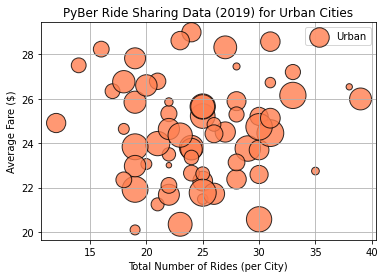

In [25]:
# Creat bubble charts for each type of city
# Urban
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, color="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride Sharing Data (2019) for Urban Cities")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

plt.show()

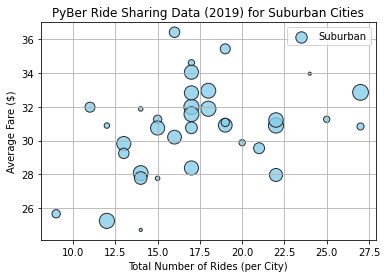

In [26]:
# Suburban
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, color="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride Sharing Data (2019) for Suburban Cities")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

plt.show()

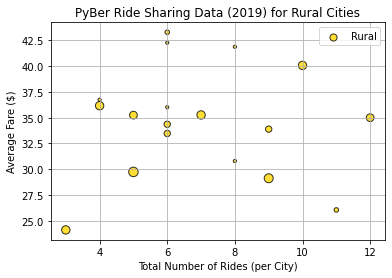

In [27]:
# Rural
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count, 
            color="gold", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Rural")
plt.title("PyBer Ride Sharing Data (2019) for Rural Cities")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

plt.show()

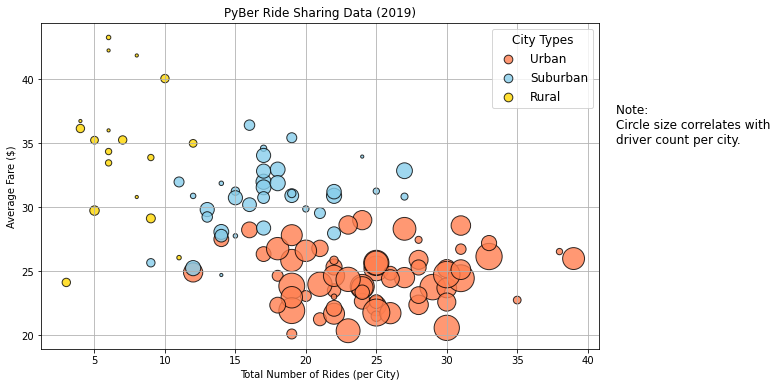

In [28]:
# Combine all 3 bubble plots
plt.subplots(figsize=(10,6))
# Urban
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, 
            color="coral", edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban")
# Suburban
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, 
            color="skyblue", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Suburban")
# Rural
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count, 
            color="gold", edgecolor="black", linewidths=1, alpha=0.8, 
            label="Rural")
# Annotations
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Specify legend
lgnd=plt.legend(fontsize="12", mode="Expanded",
               scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Note about bubble sizes
plt.text(42,35, "Note: \nCircle size correlates with \ndriver count per city.", fontsize="12")

# Save Figure
plt.savefig("Analysis/Fig1.png")

plt.show()

#### AIM 2: Statistical Summaries
- pandas methods
- numpy methods
- scipy stats module

In [29]:
# Summary statistics for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
# Summary stats for ride counts per city data series
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
# Calculating individual stats - mean
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# Calculating individual stats - median
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# Calculating individual stats - mode
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [38]:
# Import numpy and scipy stats module
import numpy as np
import scipy.stats as sts

In [39]:
# Calculate stats using numpy and stats
# Measures of central tendency
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [40]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17]), count=array([7]))

In [41]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6]), count=array([5]))

In [42]:
# Summary statics for fares
# Start by creating a new series with just fares for each type of city
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [43]:
# Calculate summary stats
# Urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
# Suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [45]:
# Rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [46]:
# Summary statistics for driver counts by city and city type
# Note: Module instructions say to use urban_cities_df, which filtered from a MERGED data set.
# Each row in urban_cities_df is a ride. There may be multiple rides in the same city, which would give multiple entries of the same driver count.
# This calculation will not give the most accurate driver count.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [47]:
# Calculating driver count from city_data_df, which has driver counts for each city
urban_drivers2 = city_data_df.loc[city_data_df["type"]=="Urban","driver_count"]
urban_drivers2

0     38
1     59
2     67
3     34
4     39
      ..
61    12
62    46
63    50
64    57
65    47
Name: driver_count, Length: 66, dtype: int64

In [48]:
mean_urban_drivers = np.mean(urban_drivers)
mean_urban_drivers

36.67815384615385

In [49]:
mean_urban_drivers2 = np.mean(urban_drivers2)
mean_urban_drivers2

36.43939393939394

In [50]:
#### We see slight differences in the means for the 2 different methods of calculation.
# To complete the exercise as instructed, I will follow the module instructions and perform the alternate calculations in parallel.

In [51]:
# Create series of driver counts for suburban and rural cities.
# Module instructions:
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

# Alternate method using city_data_df:
suburban_drivers2=city_data_df.loc[city_data_df["type"]=="Suburban", "driver_count"]
rural_drivers2=city_data_df.loc[city_data_df["type"]=="Rural", "driver_count"]

In [52]:
# Calculate mean, median, mode for all sets
# Module instructions:
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)

median_urban_drivers = np.median(urban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
median_rural_drivers = np.median(rural_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

# Alternate method:
mean_suburban_drivers2 = np.mean(suburban_drivers2)
mean_rural_drivers2 = np.mean(rural_drivers2)

median_urban_drivers2 = np.median(urban_drivers2)
median_suburban_drivers2 = np.median(suburban_drivers2)
median_rural_drivers2 = np.median(rural_drivers2)

mode_urban_drivers2 = sts.mode(urban_drivers2)
mode_suburban_drivers2 = sts.mode(suburban_drivers2)
mode_rural_drivers2 = sts.mode(rural_drivers2)

In [53]:
# Print stats results for drivers
print(f'Mean Urban\tCalculated:{mean_urban_drivers}\tAlternate:{mean_urban_drivers2}')
print(f'Mean Suburban\tCalculated:{mean_suburban_drivers}\tAlternate:{mean_suburban_drivers2}')
print(f'Mean Rural\tCalculated:{mean_rural_drivers}\tAlternate:{mean_rural_drivers2}')
print('')
print(f'Median Urban\tCalculated:{median_urban_drivers}\tAlternate:{median_urban_drivers2}')
print(f'Median Suburban\tCalculated:{median_suburban_drivers}\tAlternate:{median_suburban_drivers2}')
print(f'Median Rural\tCalculated:{median_rural_drivers}\tAlternate:{median_rural_drivers2}')
print('')
print(f'Mode Urban\nCalculated:{mode_urban_drivers}\nAlternate:{mode_urban_drivers2}')
print(f'Mode Suburban\nCalculated:{mode_suburban_drivers}\nAlternate:{mode_suburban_drivers2}')
print(f'Mode Rural\nCalculated:{mode_rural_drivers}\nAlternate:{mode_rural_drivers2}')


Mean Urban	Calculated:36.67815384615385	Alternate:36.43939393939394
Mean Suburban	Calculated:13.712	Alternate:13.61111111111111
Mean Rural	Calculated:4.296	Alternate:4.333333333333333

Median Urban	Calculated:37.0	Alternate:37.0
Median Suburban	Calculated:16.0	Alternate:15.0
Median Rural	Calculated:4.0	Alternate:4.0

Mode Urban
Calculated:ModeResult(mode=array([39]), count=array([86]))
Alternate:ModeResult(mode=array([25]), count=array([4]))
Mode Suburban
Calculated:ModeResult(mode=array([20]), count=array([79]))
Alternate:ModeResult(mode=array([20]), count=array([5]))
Mode Rural
Calculated:ModeResult(mode=array([1]), count=array([32]))
Alternate:ModeResult(mode=array([1]), count=array([5]))


In [54]:
#### The above results differ most with mode, specifically the counts

### AIM 3: Make Box and Whisker Plots from Statistical Summaries

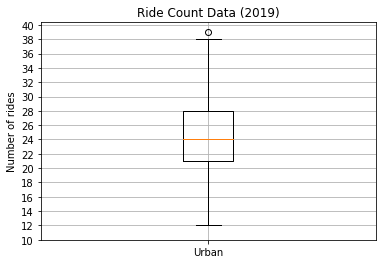

In [55]:
# Create box and whisker plot for urban cities ride count
x_labels = ["Urban"]
UrbanRideBox,ax1 = plt.subplots()
ax1.boxplot(urban_ride_count, labels = x_labels)
# Annotations
ax1.set_title("Ride Count Data (2019)")
ax1.set_ylabel("Number of rides")
ax1.set_yticks(np.arange(10,41, step=2))
ax1.grid()

plt.show()

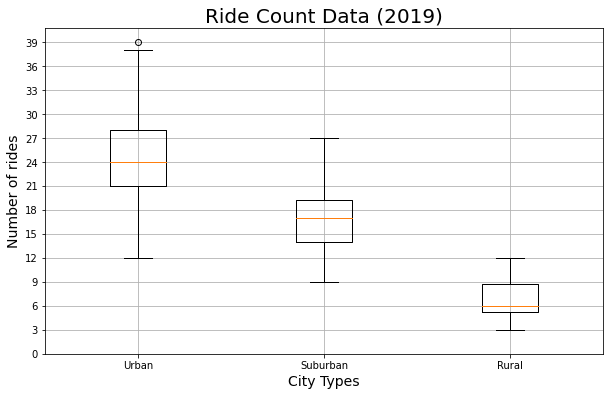

In [56]:
# Box and whisker plot for number of rides in all cities
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data =[urban_ride_count, suburban_ride_count, rural_ride_count]

AllCitiesRideBox,ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_count_data, labels = x_labels)

# Annotations
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,41, step=3))
ax.grid()

plt.savefig("Analysis/RidesBox.png")
plt.show()

In [57]:
# Find outlier for urban ride data - which city?
urban_ride_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_ride_outlier} has the highest rider count')

West Angela has the highest rider count


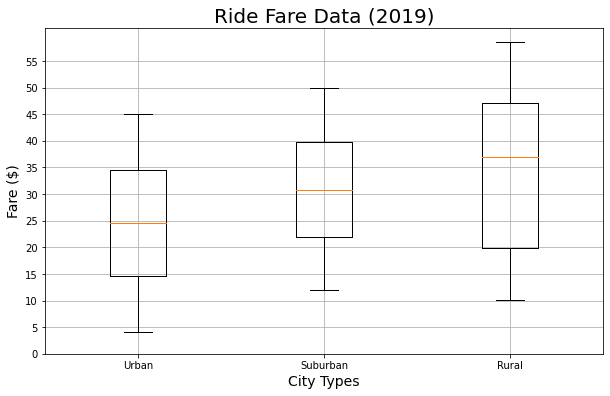

In [58]:
# Create box and whisker plots for ride fare data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data =[urban_fares, suburban_fares, rural_fares]

AllCitiesFareBox,ax2 = plt.subplots(figsize=(10,6))

ax2.boxplot(ride_fare_data, labels = x_labels)

# Annotations
ax2.set_title("Ride Fare Data (2019)", fontsize=20)
ax2.set_ylabel("Fare ($)", fontsize=14)
ax2.set_xlabel("City Types", fontsize=14)
ax2.set_yticks(np.arange(0,60, step=5))
ax2.grid()

plt.savefig("Analysis/FaresBox.png")
plt.show()

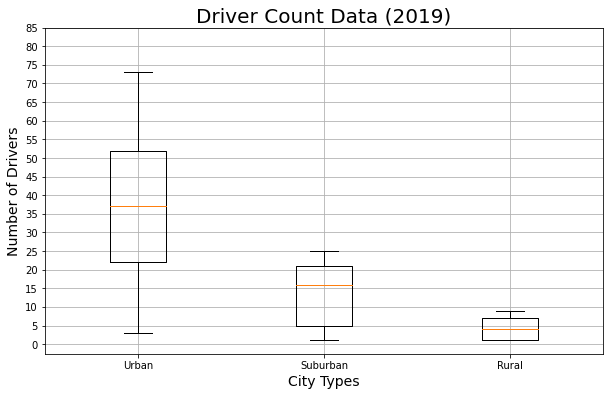

In [59]:
# Create box and whisker plots for driver counts in cities
# Note: using data calculated from module instructions
x_labels = ["Urban", "Suburban", "Rural"]
drivers_data =[urban_drivers, suburban_drivers, rural_drivers]

AllCitiesDriversBox,ax3 = plt.subplots(figsize=(10,6))

ax3.boxplot(drivers_data, labels = x_labels)

# Annotations
ax3.set_title("Driver Count Data (2019)", fontsize=20)
ax3.set_ylabel("Number of Drivers", fontsize=14)
ax3.set_xlabel("City Types", fontsize=14)
ax3.set_yticks(np.arange(0,90, step=5))
ax3.grid()

plt.savefig("Analysis/DriversBox.png")
plt.show()

### AIM 4: Graph % of fares, rides, and drivers as pie charts

In [60]:
# Fares
# Calculate sum of fares by city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [62]:
# Calculate percentages
type_percent = 100*sum_fares_by_type/total_fares
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

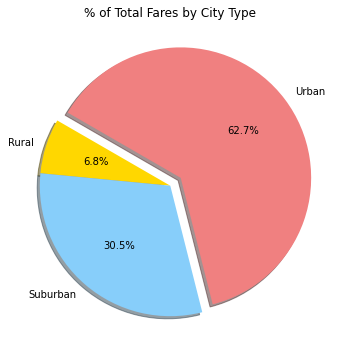

In [63]:
# Create pie chart for fares
import matplotlib as mpl

plt.subplots(figsize=(10,6))
plt.pie(type_percent,
        labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue","lightcoral"],
       explode=[0,0,0.1], autopct='%1.1f%%',
       shadow = True, startangle=150)
plt.title("% of Total Fares by City Type")

#Change default font sizes
mpl.rcParams['font.size']=14

plt.savefig("Analysis/FaresPie.png")
plt.show()

In [64]:
# Calculate ride percentages using value counts
rides_by_type = pyber_data_df["type"].value_counts()
rides_by_type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [65]:
# Calculate ride percentages using groupby and count
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [66]:
total_rides = pyber_data_df.count()["ride_id"]
total_rides

2375

In [67]:
ride_percents = rides_by_type/total_rides*100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

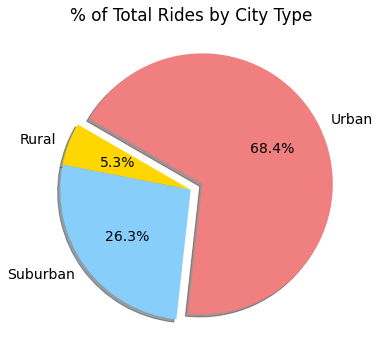

In [68]:
# Create pie chart for percentages of rides
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels =["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue","lightcoral"],
       explode=[0,0,0.1], autopct='%1.1f%%',
       shadow = True, startangle=150)
plt.title("% of Total Rides by City Type")

#Change default font sizes
mpl.rcParams['font.size']=14

plt.savefig("Analysis/RidesPie.png")
plt.show()

In [69]:
# Calculate driver percentages by city
# Skipping the intermediate steps this time:
driver_percents = 100 *city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

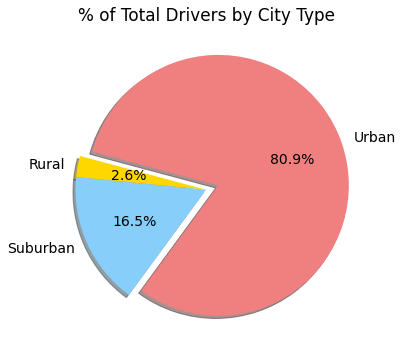

In [70]:
# Create pie chart for percent of drivers by city type
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
        labels =["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue","lightcoral"],
       explode=[0,0,0.1], autopct='%1.1f%%',
       shadow = True, startangle=165)
plt.title("% of Total Drivers by City Type")

#Change default font sizes
mpl.rcParams['font.size']=14

plt.savefig("Analysis/DriversPie.png")
plt.show()


In [75]:
urban_driver_count.describe()

count    66.000000
mean     36.439394
std      19.827819
min       3.000000
25%      22.000000
50%      37.000000
75%      49.750000
max      73.000000
Name: driver_count, dtype: float64

In [76]:
suburban_driver_count.describe()

count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

In [77]:
rural_driver_count.describe()

count    18.000000
mean      4.333333
std       2.828427
min       1.000000
25%       1.250000
50%       4.000000
75%       7.000000
max       9.000000
Name: driver_count, dtype: float64

In [78]:
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [79]:
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64